In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import time

plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 500)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

from fredapi import Fred

fred_key = 'd3327d21e28dc765c979ebf6bbc75878'

C:\Users\beall\AppData\Local\Temp\ipykernel_25360\496243854.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
# create FRED object 

fred = Fred(api_key=fred_key)

In [12]:
# search for econ data

sp_search = fred.search('S&P', order_by='popularity')

sp_search.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2024-04-01,2024-04-01,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2024-03-31,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2024-04-01 09:26:14-05:00,92,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2024-04-01,2024-04-01,S&P CoreLogic Case-Shiller U.S. National Home ...,1987-01-01,2024-01-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2024-03-26 08:11:02-05:00,88,"For more information regarding the index, plea..."
SP500,SP500,2024-04-01,2024-04-01,S&P 500,2014-04-02,2024-04-01,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2024-04-01 19:11:05-05:00,83,The observations for the S&P 500 represent the...
MEHOINUSA672N,MEHOINUSA672N,2024-04-01,2024-04-01,Real Median Household Income in the United States,1984-01-01,2022-01-01,Annual,A,2022 CPI-U-RS Adjusted Dollars,2022 CPI-U-RS Adjusted $,Not Seasonally Adjusted,NSA,2023-09-12 13:48:02-05:00,83,Household data are collected as of March. As ...
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2024-04-01,2024-04-01,ICE BofA US High Yield Index Effective Yield,1996-12-31,2024-03-31,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2024-04-01 09:26:18-05:00,82,This data represents the effective yield of th...


In [16]:
# pull raw data

sp500 = fred.get_series(series_id='SP500')

<Axes: title={'center': 'S&P 500'}>

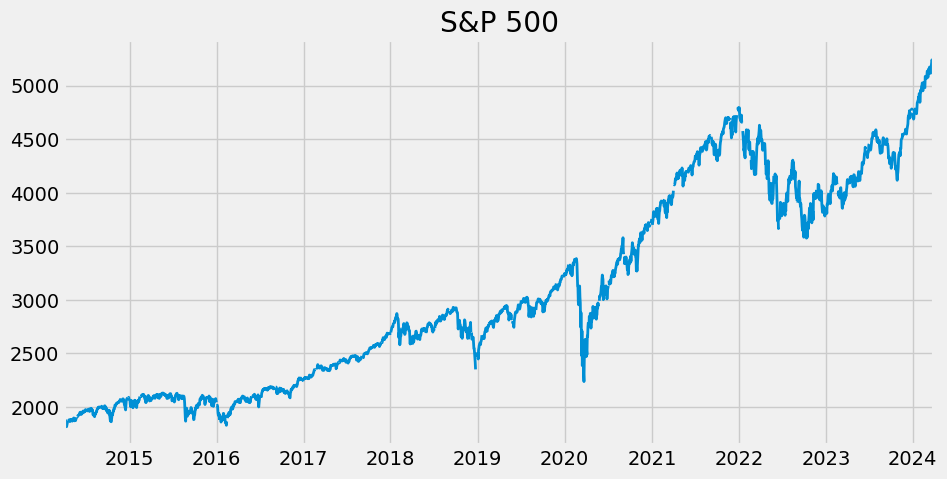

In [19]:
# plot

sp500.plot(figsize=(10,5),title='S&P 500', lw=2)

In [21]:
# pull and join series

unemp_results = fred.search('unemployment')

unemp_results

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2024-04-01,2024-04-01,Unemployment Rate,1948-01-01,2024-02-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-03-08 08:03:02-06:00,95,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2024-04-01,2024-04-01,Unemployment Rate,1948-01-01,2024-02-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2024-03-08 08:02:05-06:00,58,The unemployment rate represents the number of...
UNEMPLOY,UNEMPLOY,2024-04-01,2024-04-01,Unemployment Level,1948-01-01,2024-02-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2024-03-08 08:03:05-06:00,71,The series comes from the 'Current Population ...
NROU,NROU,2024-04-01,2024-04-01,Noncyclical Rate of Unemployment,1949-01-01,2034-10-01,Quarterly,Q,Percent,%,Not Seasonally Adjusted,NSA,2024-02-08 14:46:04-06:00,69,"Starting with the July, 2021 report: An Update..."
CCSA,CCSA,2024-04-01,2024-04-01,Continued Claims (Insured Unemployment),1967-01-07,2024-03-16,"Weekly, Ending Saturday",W,Number,Number,Seasonally Adjusted,SA,2024-03-28 07:48:04-05:00,74,"Continued claims, also referred to as insured ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LAUMT134234000000003A,LAUMT134234000000003A,2024-04-01,2024-04-01,"Unemployment Rate in Savannah, GA (MSA)",1990-01-01,2022-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2023-05-03 10:36:28-05:00,2,None
LRHUTTTTUSQ156S,LRHUTTTTUSQ156S,2024-04-01,2024-04-01,Harmonized Unemployment: Monthly Rates: Total:...,1960-01-01,2023-10-01,Quarterly,Q,Percent,%,Seasonally Adjusted,SA,2024-01-12 14:02:41-06:00,2,OECD Descriptor ID: LRHUTTTT OECD unit ID: PC ...
SAND706UR,SAND706UR,2024-04-01,2024-04-01,"Unemployment Rate in San Diego-Carlsbad, CA (MSA)",1990-01-01,2024-01-01,Monthly,M,Percent,%,Smoothed Seasonally Adjusted,SSA,2024-03-13 13:32:14-05:00,2,None


<Axes: title={'center': 'Unemployment'}>

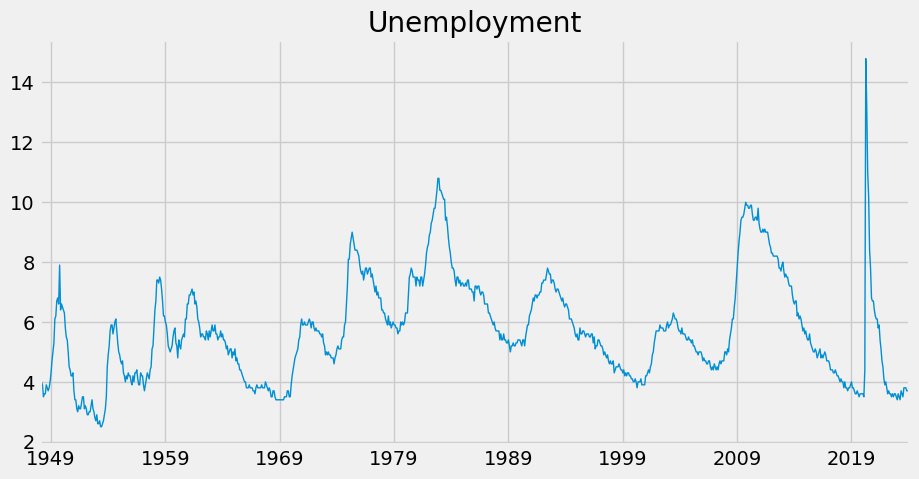

In [23]:
unrate = fred.get_series('UNRATE')

unrate.plot(figsize=(10,5), title='Unemployment', lw=1)

In [43]:
unemp_df = fred.search('unemployment rate state', filter=('frequency', 'Monthly'))

unemp_df

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2024-04-02,2024-04-02,Unemployment Rate,1948-01-01,2024-02-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-03-08 08:03:02-06:00,95,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2024-04-02,2024-04-02,Unemployment Rate,1948-01-01,2024-02-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2024-03-08 08:02:05-06:00,58,The unemployment rate represents the number of...
LNS14000006,LNS14000006,2024-04-02,2024-04-02,Unemployment Rate - Black or African American,1972-01-01,2024-02-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-03-08 08:03:04-06:00,72,The series comes from the 'Current Population ...
UNEMPLOY,UNEMPLOY,2024-04-02,2024-04-02,Unemployment Level,1948-01-01,2024-02-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2024-03-08 08:03:05-06:00,71,The series comes from the 'Current Population ...
LNU04000006,LNU04000006,2024-04-02,2024-04-02,Unemployment Rate - Black or African American,1972-01-01,2024-02-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2024-03-08 08:02:10-06:00,23,The series comes from the 'Current Population ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LNU04032220,LNU04032220,2024-04-02,2024-04-02,Unemployment Rate - Sales and Related Occupations,2000-01-01,2024-02-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2024-03-08 08:02:37-06:00,4,The series comes from the 'Current Population ...
SCMARI7URN,SCMARI7URN,2024-04-02,2024-04-02,"Unemployment Rate in Marion County, SC",1990-01-01,2024-01-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2024-03-13 10:16:05-05:00,4,These data come from the Current Population Su...
VAALBE7URN,VAALBE7URN,2024-04-02,2024-04-02,"Unemployment Rate in Albemarle County, VA",1990-01-01,2024-01-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2024-03-13 10:26:13-05:00,4,These data come from the Current Population Su...


In [44]:
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')

In [45]:
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]

In [62]:
unemp_df

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2024-04-02,2024-04-02,Unemployment Rate,1948-01-01,2024-02-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-03-08 08:03:02-06:00,95,The unemployment rate represents the number of...
LNS14000006,LNS14000006,2024-04-02,2024-04-02,Unemployment Rate - Black or African American,1972-01-01,2024-02-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-03-08 08:03:04-06:00,72,The series comes from the 'Current Population ...
CAUR,CAUR,2024-04-02,2024-04-02,Unemployment Rate in California,1976-01-01,2024-02-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-03-25 16:05:02-05:00,64,None
TXUR,TXUR,2024-04-02,2024-04-02,Unemployment Rate in Texas,1976-01-01,2024-02-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-03-25 16:02:03-05:00,56,None
M0892AUSM156SNBR,M0892AUSM156SNBR,2024-04-02,2024-04-02,Unemployment Rate for United States,1929-04-01,1942-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2012-08-17 14:26:06-05:00,54,Series Is Presented Here As Three Variables--(...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LNS14000048,LNS14000048,2024-04-02,2024-04-02,Unemployment Rate - 25 Yrs. & over,1948-01-01,2024-02-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-03-08 08:03:47-06:00,6,The series comes from the 'Current Population ...
LNS14000089,LNS14000089,2024-04-02,2024-04-02,Unemployment Rate - 25-34 Yrs.,1948-01-01,2024-02-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-03-08 08:03:53-06:00,6,The series comes from the 'Current Population ...
M08311USM156SNBR,M08311USM156SNBR,2024-04-02,2024-04-02,"Unemployment Rate, Married Males, Spouse Prese...",1954-11-01,1968-01-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2012-08-17 14:28:17-05:00,6,Beginning In 1960 Data Include Alaska And Hawa...


In [70]:
drop_list = []

for state in unemp_df.index:
    if len(state) != 4:
        drop_list.append(_)

drop_list

In [69]:
all_results = []

for myid in unemp_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)

unemp_results = pd.concat(all_results, axis=1).drop(drop_list, axis=1)

unemp_results

ValueError: 4

In [58]:
pd.concat(all_results, axis=1)

,UNRATE,LNS14000006,CAUR,TXUR,M0892AUSM156SNBR,LNS14000024,LNS14000031,M0892BUSM156SNBR,NYUR,U2RATE,FLUR,LNS14000002,LNS14000009,LNS14000003,PAUR,OHUR,LNS14000001,LNS14027660,MIUR,LNS14027662,ALUR,LNS14024887,MAUR,NCUR,ILUR,NJUR,GAUR,COUR,AZUR,WIUR,VAUR,KYUR,LRUN64TTUSM156S,SCUR,NMUR,MNUR,TNUR,LNS14032183,LNS14000012,WAUR,LNS14027659,MDUR,ORUR,WVUR,NVUR,ARUR,OKUR,MOUR,AKUR,IAUR,UTUR,PRUR,INUR,LAUR,HIUR,LASMT261982000000003,NDUR,MTUR,DCUR,MSUR,LNS14000060,LNS14000028,MEUR,NEUR,LASMT391746000000003,CTUR,IDUR,NHUR,LNS14000018,RIUR,KSUR,WYUR,DEUR,LNS14000036,VTUR,LNS14000032,SDUR,CMWRUR,LNS14200000,LRUN24TTUSM156S,LNS14027689,LNS14100000,LNS14000315,LNS14000029,LNS14024230,CSOUUR,LNS14000025,LNS14000061,CNERUR,LRUNTTTTUSM156S,CWSTUR,CNEWUR,LNS14000026,LNS14000048,LNS14000089,M08311USM156SNBR,LNS14000150,LRUN25TTUSM156S
1948-01-01,3.4,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,3.3,NaN,NaN,NaN,NaN,3.4,NaN,NaN,NaN,NaN,6.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.9,NaN,3.0,2.3,NaN,NaN,NaN,NaN,2.8,2.6,3.0,NaN,NaN,NaN
1948-02-01,3.8,NaN,NaN,NaN,NaN,3.3,NaN,NaN,NaN,NaN,NaN,4.5,NaN,NaN,NaN,NaN,3.6,NaN,NaN,NaN,NaN,7.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.1,NaN,3.1,2.6,NaN,NaN,NaN,NaN,3.9,2.9,3.3,NaN,NaN,NaN
1948-03-01,4.0,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN,4.4,NaN,NaN,NaN,NaN,3.8,NaN,NaN,NaN,NaN,8.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,3.3,2.6,NaN,NaN,NaN,NaN,3.9,2.8,2.9,NaN,NaN,NaN
1948-04-01,3.9,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN,4.3,NaN,NaN,NaN,NaN,3.8,NaN,NaN,NaN,NaN,7.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,3.4,2.8,NaN,NaN,NaN,NaN,3.7,3.0,3.4,NaN,NaN,NaN
1948-05-01,3.5,NaN,NaN,NaN,NaN,3.3,NaN,NaN,NaN,NaN,NaN,3.7,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,6.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.1,NaN,3.2,2.5,NaN,NaN,NaN,NaN,3.4,2.8,3.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1946-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1946-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,